In [1]:
# Importing Necessary Libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [2]:
# Uploading Dataset / File.
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [3]:
data = pd.read_csv("advertising.csv")

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data.shape

(200, 4)

In [8]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [9]:
data.duplicated().sum()

0

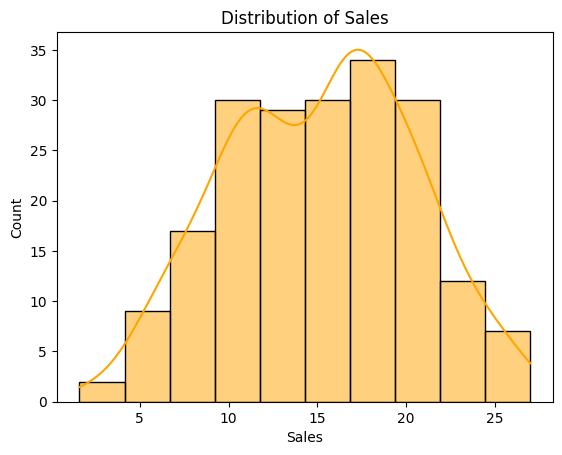

In [10]:
# Creating Histogram.
sns.histplot(data['Sales'], kde=True, color='orange')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Distribution of Sales')
plt.show()

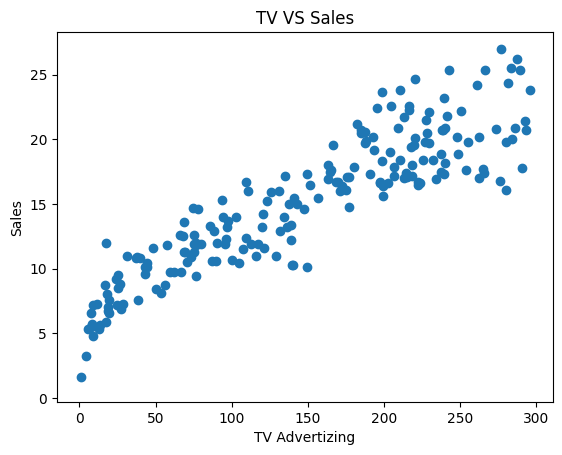

In [11]:
# Creating Scatter Plot.
plt.plot(1,3,1)
plt.scatter(data['TV'], data['Sales'])
plt.title('TV VS Sales')
plt.xlabel('TV Advertizing')
plt.ylabel('Sales')
plt.show()

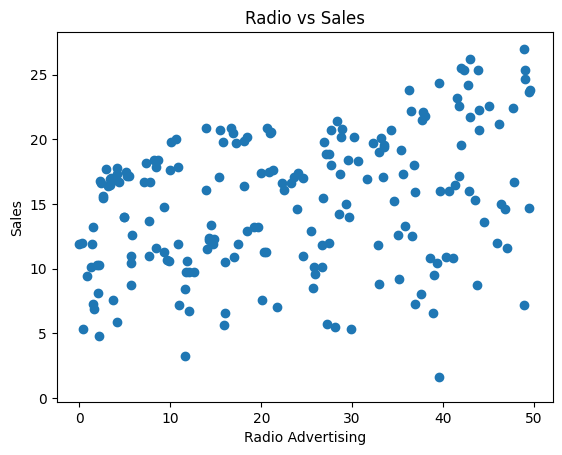

In [12]:
# Creating Scatter Plot.
plt.plot(1, 3, 1)
plt.scatter(data['Radio'], data['Sales'])
plt.title('Radio vs Sales')
plt.xlabel('Radio Advertising')
plt.ylabel('Sales')
plt.show()

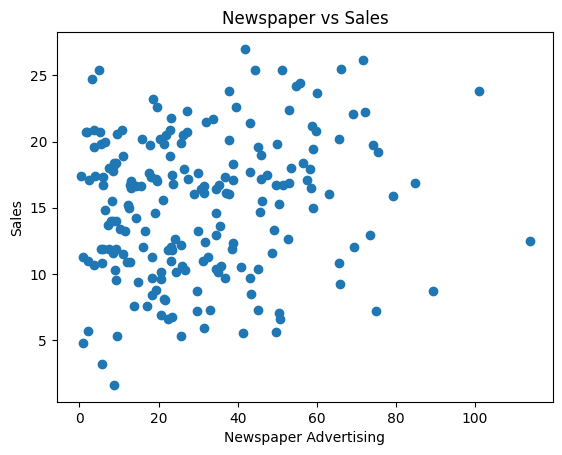

In [13]:
# Creating Scatter Plot.
plt.plot(1, 3, 3)
plt.scatter(data['Newspaper'], data['Sales'])
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper Advertising')
plt.ylabel('Sales')
plt.show()

In [14]:
# Creating Correlation  Metric.
correlation = data[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
print(correlation)# Displaying Correlation Matrix.

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


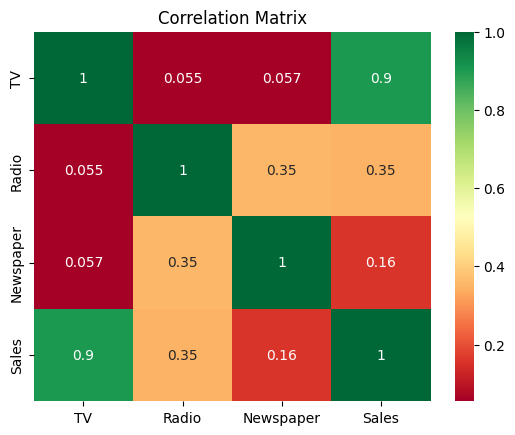

In [15]:
# Displaying Correlation Matrix.
sns.heatmap(correlation, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()


In [16]:
# Creating DataFrame.
x = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
print(x,y)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [17]:
# Splitting the data.
xtrain, xtest, ytrain, ytest  = train_test_split(x, y, test_size=0.3, random_state=42)

# Creating and fitting the linear regression model.
lr_model = LinearRegression()
lr_model.fit(xtrain,ytrain)

LinearRegression()

In [18]:
# Making Prediction.
ypred = lr_model.predict(xtest)
ypred[10]


8.975846634860197

In [19]:
# Calculating the coefficient of determination (R-squared) for our linear regression model (Training Dataset).
lr_model.score(xtrain,ytrain)*100

89.19647339302077

In [20]:
# Calculating the coefficient of determination (R-squared) for our linear regression model (Testing Dataset).
lr_model.score(xtest,ytest)*100

90.914843418498

In [21]:
# Calculating and printing several evaluation metrics for our regression model predictions.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(ytest,ypred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(ytest,ypred)
print("Mean Absolute Error:", mae)

r2_score = r2_score(ytest,ypred)
print("Root Squared Score:", r2_score)

rmse = np.sqrt(mean_squared_error(ytest,ypred))
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 2.541624036229147
Mean Absolute Error: 1.1594875061090582
Root Squared Score: 0.9091484341849799
Root Mean Squared Error: 1.5942471691143587


In [22]:
# Creating and fitting a Random Forest Regressor model using scikit-learn.
rfr_model = RandomForestRegressor()
rfr_model.fit(xtrain, ytrain)


RandomForestRegressor()

In [23]:
# Predicting the target values.
ypred = rfr_model.predict(xtest)
ypred[10]

8.364000000000003

In [24]:
# Calculating the coefficient of determination (R-squared) for our linear regression model (Training Dataset).
rfr_model.score(xtrain,ytrain)*100

99.0076969450298

In [25]:
# Calculating the coefficient of determination (R-squared) for our linear regression model (Testing Dataset).
rfr_model.score(xtest,ytest)*100

94.25776290501116

In [26]:
# Calculating and printing several evaluation metrics for our regression model predictions.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(ytest,ypred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(ytest,ypred)
print("Mean Absolute Error:", mae)

r2_score = r2_score(ytest,ypred)
print("Root Squared Score:", r2_score)

rmse = np.sqrt(mean_squared_error(ytest,ypred))
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 1.6064233666666672
Mean Absolute Error: 1.0293333333333328
Root Squared Score: 0.9425776290501116
Root Mean Squared Error: 1.2674475794551296


In [27]:
# Creating Scatter Plot.
import plotly.express as px
tv_sales = px.scatter(data, x = 'TV', y = 'Sales', title = 'TV VS Sales')
tv_sales.update_layout(xaxis_title = 'TV', yaxis_title = 'Sales')
tv_sales.show()

In [28]:
# Creating Scatter Plot.
np_sales = px.scatter(data, x = 'Newspaper', y = 'Sales', title = 'Newspaper VS Sales')   #np = newspaper
np_sales.update_layout(xaxis_title = 'Newspaper', yaxis_title = 'Sales')
np_sales.show()

In [29]:
# Creating Scatter Plot.
ro_sales = px.scatter(data, x = 'Radio', y = 'Sales', title = 'Radio VS Sales')   #ro = radio
ro_sales.update_layout(xaxis_title = 'Radio', yaxis_title = 'Sales')
ro_sales.show()

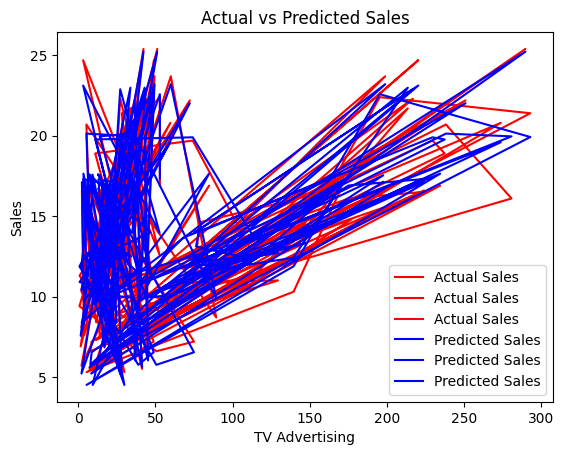

In [30]:
# Creating a plot for comparing actual and predicted sales.
plt.plot(xtest, ytest, color='red', label='Actual Sales')
plt.plot(xtest, ypred, color='blue', label='Predicted Sales')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()